# Topic Modeling: BERTopic

[BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html) is a language model developed by the Hugging Face team. It is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, which is a transformer-based architecture for natural language processing tasks such as language understanding and language generation. BERT has been widely successful in a number of NLP tasks, and BERTopic is a variant that has been specifically designed to perform well on topic classification and other tasks related to identifying the main topic or theme of a piece of text.

Like other transformer models, BERTopic is trained using large amounts of data and is able to process input text in a way that takes into account the context and relationships between words in the text. This allows it to understand the meaning of words and phrases and make predictions about the topic or themes that are present in the text. BERTopic has been shown to be effective in a number of topic classification tasks and has been used in applications such as text summarization and content recommendation.

In [1]:
# Load necessary packages
import pandas as pd
from bertopic import BERTopic

import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
# svg_renderer.width = 900
# svg_renderer.height = 700
pio.renderers.default = "svg"

In [2]:
# Load the data
df = pd.read_hdf('./../../code/data/starbucks/data.h5', key='preprocessed_starbucks')

In [3]:
# Store only the required tweets
docs = df['preprocessed_tweet'].values.tolist()

BERTopic and other transformer-based models like it are designed to be able to process raw text input directly, without the need for extensive preprocessing. This is because they are able to automatically learn the relevant features from the input data during training, and do not require explicit feature engineering or representation like many other machine learning models.

One of the key features of transformer models is their ability to process input text using self-attention mechanisms, which allow them to take into account the relationships between words in the text and how they are related to one another. This enables them to understand the meaning of words and phrases and make predictions about their roles and relationships within the text, without the need for explicit preprocessing or feature engineering.

In addition, transformer models like BERTopic are trained on large amounts of data, which helps them learn the underlying patterns and structure of the language and allows them to generalize well to new, unseen text. This means that they are able to perform well on a wide range of natural language processing tasks, including topic classification, without the need for extensive preprocessing of the input data.

Since BERtopic is capable of utilizing deep learning based custom embeddings, the embeddings that will be used in the project is "all-MiniLM-L6-v2". It is an all-round model tuned for many use-cases which are trained on a large and diverse dataset of over 1 billion training pairs.

In [4]:
# Fit the model and apply the transformation
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
print(f"Total number of topics idetermined by the algorithm in the document: {topic_model.get_topic_freq().shape[0]}")

Total number of topics idetermined by the algorithm in the document: 58


To get the topics that were determined by the algorithms for the dataset:

In [ ]:
# Get the topic distribution
topic_model.get_topic_info()

Topic  Count                                 Name
0      -1   1129               -1_like_work_drink_day
1       0    100            0_seattle_shop_walk_store
2       1     79             1_drink_fall_flavor_menu
3       2     73                2_hng_fucking_haha_ew
4       3     66            3_pumpkin_spice_foam_cold
5       4     60       4_barista_baristas_order_basis
6       5     53               5_money_buy_save_spend
7       6     52        6_union_unionize_worker_labor
8       7     50               7_cup_svg_holiday_glow
9       8     50           8_nft_polygon_odyssey_web3
10      9     46          9_work_job_college_complain
11     10     45               10_gift_card_100_enter
12     11     43           11_morning_wake_good_sleep
13     12     40                12_know_wait_open_omg
14     13     38             13_happy_love_cheer_hate
15     14     36               14_day_week_free_today
16     15     33             15_oat_iced_milk_caramel
17     16     33          16_closet_listing_add_check
18     17     32          17_order_mobile_galaxy_fast
19     18     30             18_china_product_50_2025
20     19     30     19_holiday_year_gingerbread_xmas
21     20     28              20_want_hurry_need_lazy
22     21     27     21_sandwich_breakfast_turkey_egg
23     22     27   22_frappe_frappuccino_bean_vanilla
24     23     26     23_dunkin_donut_prefer_emphasize
25     24     25                24_bio_job_link_click
26     25     25   25_tweet_twitter_iphone_capitalism
27     26     24              26_matcha_wari_chai_3la
28     27     23       27_thank_unroll_tru_remarkable
29     28     22                28_work_late_shift_af
30     29     22               29_sip_piss_313pm_niks
31     30     22          30_drive_fly_roll_yesterday
32     31     21                    31_pay_test_10_17
33     32     20           32_price_raise_afford_cent
34     33     20              33_birthday_date_na_wan
35     34     20    34_luck_entry_wonderful_wednesday
36     35     18      35_narasimhan_ceo_laxman_howard
37     36     18     36_addiction_addict_lately_crave
38     37     17       37_chocolate_cookie_ebbite_hot
39     38     17                  38_gtgtgt_gt_bf_430
40     39     16             39_item_share_love_check
41     40     16        40_target_icee_realize_inside
42     41     15               41_line_long_gate_fuck
43     42     15             42_animal_dog_vegan_pain
44     43     14               43_bring_mom_coast_beg
45     44     14        44_croissant_almond_rid_local
46     45     13       45_survey_paypal_itunes_redeem
47     46     13       46_sue_kidnapping_lawsuit_case
48     47     13        47_cash_legal_tender_cashless
49     48     13              48_yell_omfg_sing_start
50     49     13           49_offense_bos_generous_ha
51     50     12  50_mcdonald_mcdonalds_adidas_hehehe
52     51     11           51_reward_account_hack_bye
53     52     11          52_water_smell_taste_season
54     53     11         53_listen_phoebe_bridger_sit
55     54     10           54_delta_skymile_earn_link
56     55     10     55_conservative_liberal_wing_far
57     56     10      56_like_murder_recognize_report

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


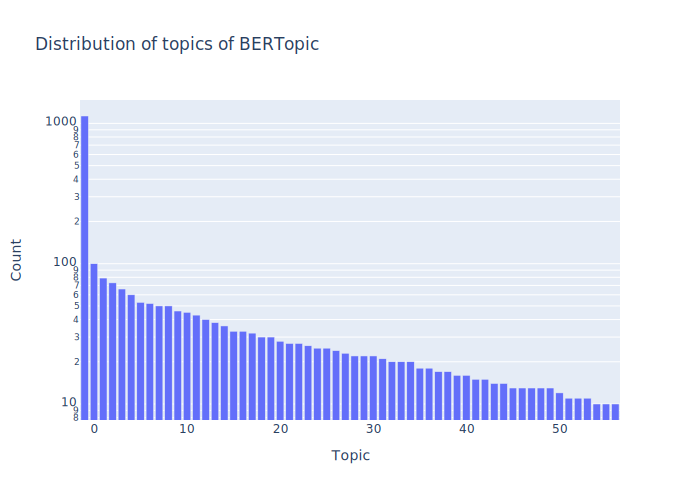

In [ ]:
# Plot the topic distribution
fig = px.bar(topic_model.get_topic_info(), x='Topic', y='Count', log_y=True, title="Distribution of topics of BERTopic")
fig.show()

The topic "-1" represents outliers. There is several outliers that are reported by the algorithm. These documents or tweets do not belong to any topic that are found in the data set.

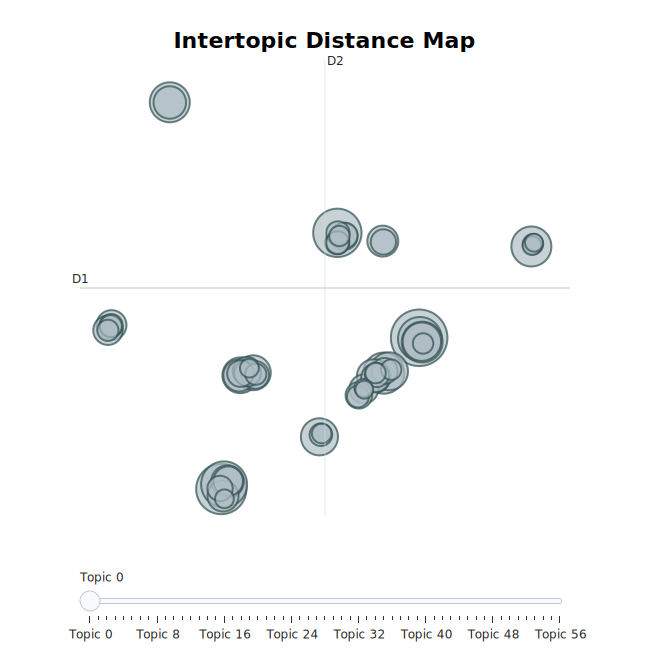

In [ ]:
# Visualize the topic
topic_model.visualize_topics()

The above graph tells us that, there are certain major topics and certain minor topics. Most of the topics are subset of other topics. Hence it is prudent to reduce the number of topics.

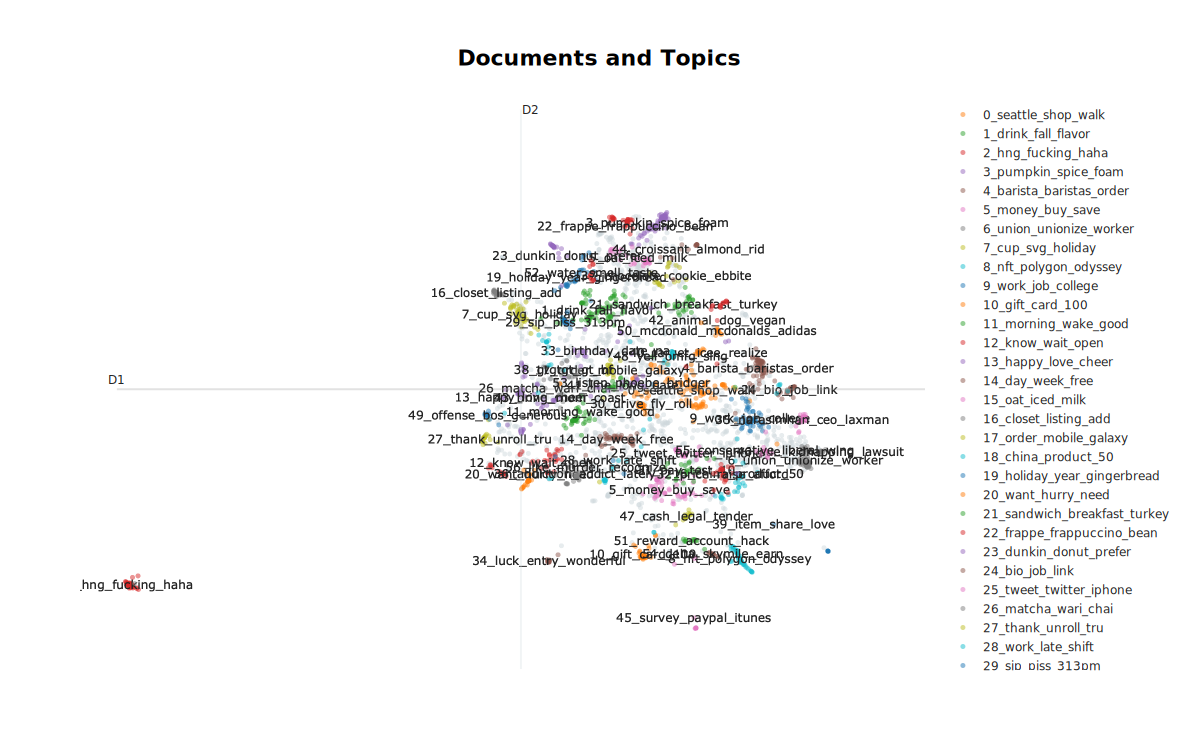

In [ ]:
topic_model.visualize_documents(docs)

From the above graph it can be observed that the topics are not perfectly separable.

For reducing the number of topics:

In [ ]:
# Reduce the number of topics
topic_model.reduce_topics(docs, nr_topics='auto')

2022-12-16 23:15:52,869 - BERTopic - Reduced number of topics from 31 to 31


In [ ]:
# Get the updated topic distribution
topic_model.get_topic_info()

Topic  Count                                Name
0      -1   1129              -1_like_drink_work_day
1       0    705                0_gift_card_work_pay
2       1    100           1_shop_seattle_store_walk
3       2     77            2_oat_sandwich_iced_milk
4       3     73               3_fucking_hng_haha_ew
5       4     66           4_pumpkin_spice_cold_foam
6       5     60       5_barista_baristas_order_know
7       6     52       6_union_worker_unionize_labor
8       7     50               7_cup_svg_holiday_new
9       8     43           8_morning_wake_good_sleep
10      9     32        9_order_mobile_galaxy_double
11     10     30    10_holiday_year_gingerbread_xmas
12     11     28             11_want_need_hurry_lazy
13     12     27  12_frappe_frappuccino_bean_vanilla
14     13     26        13_dunkin_donut_prefer_wrong
15     14     25  14_tweet_twitter_iphone_capitalism
16     15     24             15_matcha_wari_chai_3la
17     16     23      16_thank_unroll_tru_remarkable
18     17     22              17_sip_piss_313pm_niks
19     18     22         18_drive_fly_roll_yesterday
20     19     18     19_narasimhan_ceo_laxman_howard
21     20     18    20_addiction_addict_lately_crave
22     21     17                 21_gtgtgt_gt_bf_app
23     22     16       22_target_icee_realize_inside
24     23     15            23_animal_dog_vegan_pain
25     24     14       24_croissant_almond_rid_local
26     25     13      25_sue_kidnapping_case_lawsuit
27     26     13             26_yell_omfg_sing_start
28     27     12    27_mcdonald_mcdonalds_eat_fetish
29     28     10          28_delta_skymile_earn_link
30     29     10    29_conservative_liberal_far_wing

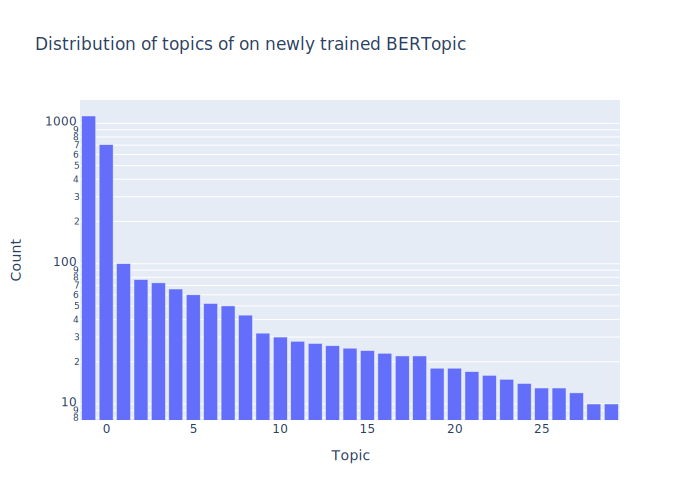

In [ ]:
# Plot the topic distribution
fig = px.bar(topic_model.get_topic_info(), x='Topic', y='Count', log_y=True, title="Distribution of topics of on newly trained BERTopic")
fig.show()

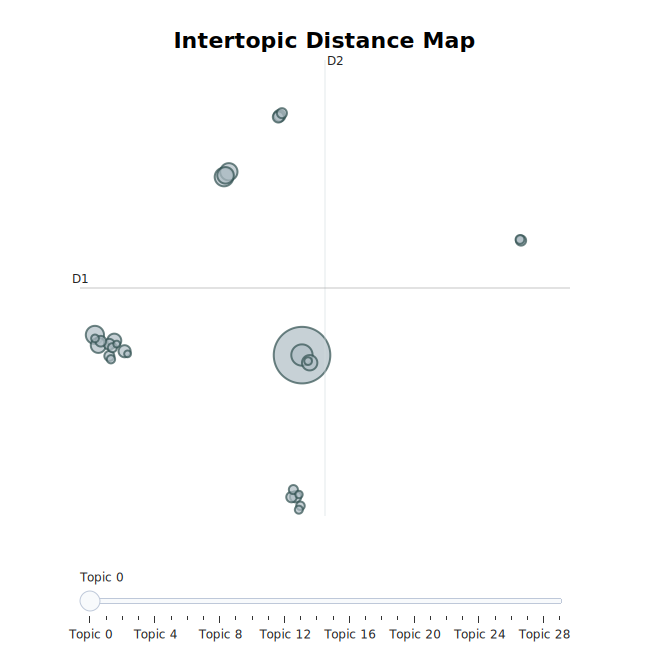

In [ ]:
# Visualize the topic
topic_model.visualize_topics()

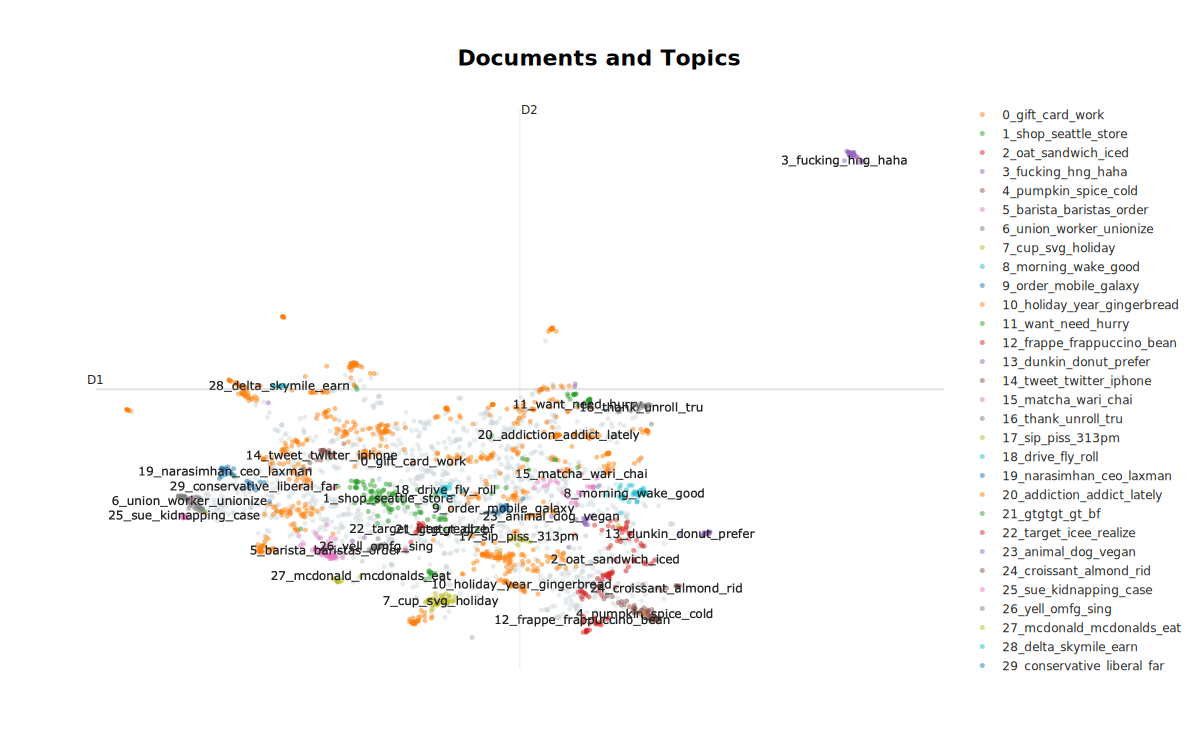

In [ ]:
topic_model.visualize_documents(docs)

The topics now seems to be fairly separable and hence this can be considered as a better model than the initial model.